In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import tensorflow as tf

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
validation_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
train_ds = train_datagen.flow_from_directory(
   '/content/drive/MyDrive/Cotton data new/train',
    target_size = (128, 128),
    batch_size = 32,
    class_mode = 'categorical'
)

val_ds = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Cotton data new/val',
    target_size = (128, 128),
    batch_size = 32,
    class_mode = 'categorical'
)

test_ds = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Cotton data new/test',
    target_size = (128, 128),
    batch_size = 32,
    shuffle = False,
    class_mode = 'categorical'
)

Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
InceptionV3 = tf.keras.applications.InceptionV3(
    include_top=False,
    weights = 'imagenet',
    input_shape=(128,128,3),
    )
InceptionV3.trainable = False
model = tf.keras.models.Sequential([
  InceptionV3,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=256, activation='relu'),
  tf.keras.layers.Dense(units=4, activation='softmax'),
    ])

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 26129956 (99.68 MB)
Trainable params: 4327

In [ ]:
history = model.fit(
    x = train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
61/61 [==============================] - 19s 316ms/step - loss: 0.3022 - accuracy: 0.8888 - val_loss: 0.3078 - val_accuracy: 0.8933
Epoch 2/10
61/61 [==============================] - 20s 327ms/step - loss: 0.2834 - accuracy: 0.8980 - val_loss: 0.3466 - val_accuracy: 0.8735
Epoch 3/10
61/61 [==============================] - 20s 331ms/step - loss: 0.2986 - accuracy: 0.8872 - val_loss: 0.2734 - val_accuracy: 0.8972
Epoch 4/10
61/61 [==============================] - 21s 337ms/step - loss: 0.3123 - accuracy: 0.8847 - val_loss: 0.3032 - val_accuracy: 0.8893
Epoch 5/10
61/61 [==============================] - 21s 337ms/step - loss: 0.2483 - accuracy: 0.8995 - val_loss: 0.2440 - val_accuracy: 0.9091
Epoch 6/10
61/61 [==============================] - 19s 312ms/step - loss: 0.2814 - accuracy: 0.8908 - val_loss: 0.3185 - val_accuracy: 0.8696
Epoch 7/10
61/61 [==============================] - 21s 338ms/step - loss: 0.2616 - accuracy: 0.9052 - val_loss: 0.2796 - val_accuracy: 0.9130

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy: " + str(accuracy))
print("Loss: " + str(loss))

4/4 [==============================] - 37s 12s/step - loss: 0.3096 - accuracy: 0.8868
Accuracy: 0.8867924809455872
Loss: 0.3096296489238739


In [ ]:
from sklearn.metrics import classification_report
X_test = []
Y_true = []
for i in range(len(test_ds)):
    test_data, test_labels = test_ds[i]
    X_test.append(test_data)
    Y_true.append(np.argmax(test_labels, axis=1))
X_test = np.concatenate(X_test)
Y_true = np.concatenate(Y_true)
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
class_labels = list(test_ds.class_indices.keys())
report = classification_report(Y_true, Y_pred_classes, target_names=class_labels)
print(report)

4/4 [==============================] - 2s 39ms/step
                       precision    recall  f1-score   support

 diseased cotton leaf       0.95      0.84      0.89        25
diseased cotton plant       0.84      0.93      0.88        28
  healthy cotton leaf       0.83      0.92      0.87        26
 healthy cotton plant       0.96      0.85      0.90        27

             accuracy                           0.89       106
            macro avg       0.89      0.89      0.89       106
         weighted avg       0.89      0.89      0.89       106



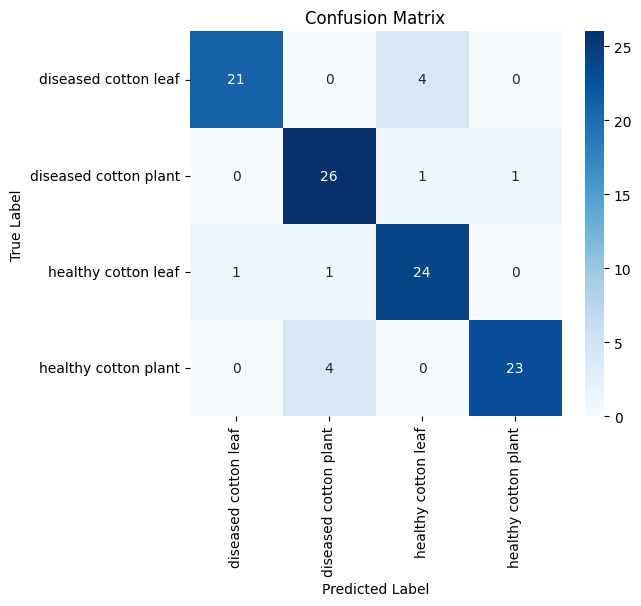

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
class_labels = list(val_ds.class_indices.keys())
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

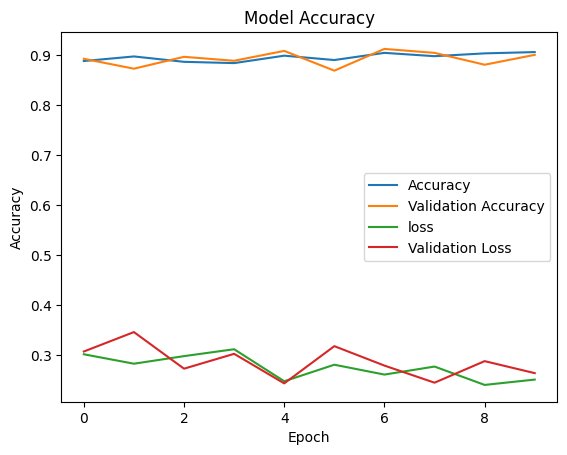

In [ ]:
#Ploting Acuracy & Loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

### ***Xception model***

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input

In [ ]:
XceptionModel = Xception(
    include_top=False,
    weights='imagenet',
    input_shape=(128, 128, 3),
)

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
XceptionModel.trainable = False

model = tf.keras.models.Sequential([
    XceptionModel,
    tf.keras.layers.GlobalAveragePooling2D(),  # Replace Flatten() with GlobalAveragePooling2D()
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                      

In [ ]:
history = model.fit(
    x=train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
61/61 [==============================] - 21s 341ms/step - loss: 0.2482 - accuracy: 0.9103 - val_loss: 0.3518 - val_accuracy: 0.8617
Epoch 2/10
61/61 [==============================] - 20s 320ms/step - loss: 0.2633 - accuracy: 0.9021 - val_loss: 0.3129 - val_accuracy: 0.9091
Epoch 3/10
61/61 [==============================] - 21s 342ms/step - loss: 0.2540 - accuracy: 0.9036 - val_loss: 0.3315 - val_accuracy: 0.8893
Epoch 4/10
61/61 [==============================] - 19s 318ms/step - loss: 0.2031 - accuracy: 0.9216 - val_loss: 0.3899 - val_accuracy: 0.8775
Epoch 5/10
61/61 [==============================] - 20s 326ms/step - loss: 0.2266 - accuracy: 0.9211 - val_loss: 0.3328 - val_accuracy: 0.8933
Epoch 6/10
61/61 [==============================] - 21s 345ms/step - loss: 0.2571 - accuracy: 0.9129 - val_loss: 0.3192 - val_accuracy: 0.9012
Epoch 7/10
61/61 [==============================] - 20s 324ms/step - loss: 0.2199 - accuracy: 0.9175 - val_loss: 0.3274 - val_accuracy: 0.8854

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy: " + str(accuracy))
print("Loss: " + str(loss))

4/4 [==============================] - 3s 762ms/step - loss: 0.2433 - accuracy: 0.9151
Accuracy: 0.9150943160057068
Loss: 0.2432570904493332


In [ ]:
from sklearn.metrics import classification_report
X_test = []
Y_true = []
for i in range(len(test_ds)):
    test_data, test_labels = test_ds[i]
    X_test.append(test_data)
    Y_true.append(np.argmax(test_labels, axis=1))
X_test = np.concatenate(X_test)
Y_true = np.concatenate(Y_true)
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
class_labels = list(test_ds.class_indices.keys())
report = classification_report(Y_true, Y_pred_classes, target_names=class_labels)
print(report)

4/4 [==============================] - 1s 62ms/step
                       precision    recall  f1-score   support

 diseased cotton leaf       0.96      0.88      0.92        25
diseased cotton plant       0.93      0.93      0.93        28
  healthy cotton leaf       0.83      0.96      0.89        26
 healthy cotton plant       0.96      0.89      0.92        27

             accuracy                           0.92       106
            macro avg       0.92      0.91      0.92       106
         weighted avg       0.92      0.92      0.92       106



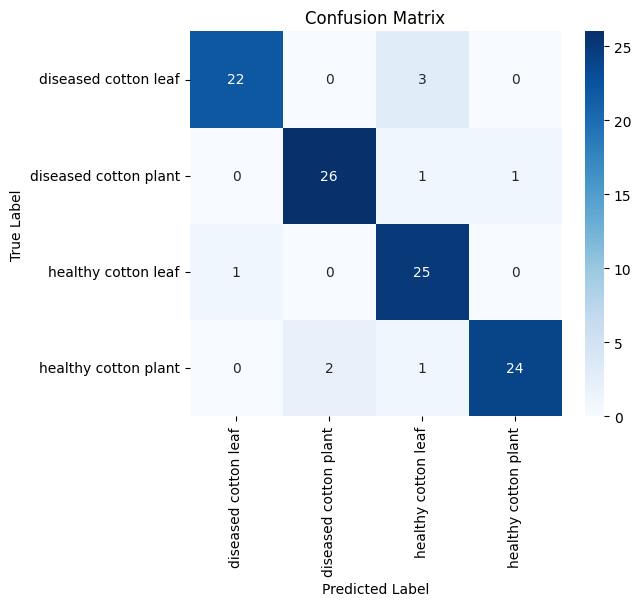

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
class_labels = list(val_ds.class_indices.keys())
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

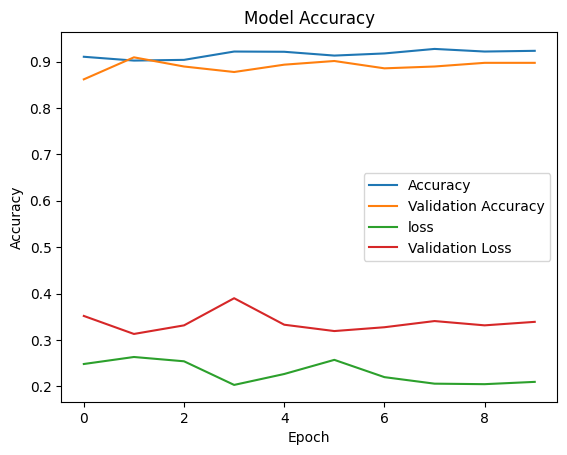

In [ ]:
#Ploting Acuracy & Loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

### ***DenseNet201***

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.densenet import preprocess_input

DenseNet201Model = DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(128, 128, 3),
)
DenseNet201Model.trainable = False

model = tf.keras.models.Sequential([
    DenseNet201Model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='softmax'),
])

# Compile the model (add optimizer, loss function, and metrics as needed)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


74836368/74836368 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 4, 4, 1920)        18321984  
                                                                 
 global_average_pooling2d_1  (None, 1920)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 1920)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               983552    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 4)                 

In [ ]:
history = model.fit(
    x=train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
61/61 [==============================] - 48s 525ms/step - loss: 0.5734 - accuracy: 0.7817 - val_loss: 0.2754 - val_accuracy: 0.8972
Epoch 2/10
61/61 [==============================] - 20s 333ms/step - loss: 0.3474 - accuracy: 0.8637 - val_loss: 0.4386 - val_accuracy: 0.8498
Epoch 3/10
61/61 [==============================] - 21s 348ms/step - loss: 0.3208 - accuracy: 0.8672 - val_loss: 0.4122 - val_accuracy: 0.8538
Epoch 4/10
61/61 [==============================] - 20s 326ms/step - loss: 0.3107 - accuracy: 0.8801 - val_loss: 0.1907 - val_accuracy: 0.9249
Epoch 5/10
61/61 [==============================] - 21s 338ms/step - loss: 0.2849 - accuracy: 0.8908 - val_loss: 0.1854 - val_accuracy: 0.9328
Epoch 6/10
61/61 [==============================] - 20s 328ms/step - loss: 0.2214 - accuracy: 0.9093 - val_loss: 0.1708 - val_accuracy: 0.9368
Epoch 7/10
61/61 [==============================] - 21s 345ms/step - loss: 0.2525 - accuracy: 0.8990 - val_loss: 0.1704 - val_accuracy: 0.9447

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy: " + str(accuracy))
print("Loss: " + str(loss))

4/4 [==============================] - 5s 2s/step - loss: 0.1362 - accuracy: 0.9434
Accuracy: 0.9433962106704712
Loss: 0.13619735836982727


In [ ]:
from sklearn.metrics import classification_report
X_test = []
Y_true = []
for i in range(len(test_ds)):
    test_data, test_labels = test_ds[i]
    X_test.append(test_data)
    Y_true.append(np.argmax(test_labels, axis=1))
X_test = np.concatenate(X_test)
Y_true = np.concatenate(Y_true)
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
class_labels = list(test_ds.class_indices.keys())
report = classification_report(Y_true, Y_pred_classes, target_names=class_labels)
print(report)

4/4 [==============================] - 3s 82ms/step
                       precision    recall  f1-score   support

 diseased cotton leaf       1.00      0.84      0.91        25
diseased cotton plant       1.00      0.96      0.98        28
  healthy cotton leaf       0.84      1.00      0.91        26
 healthy cotton plant       0.96      0.96      0.96        27

             accuracy                           0.94       106
            macro avg       0.95      0.94      0.94       106
         weighted avg       0.95      0.94      0.94       106



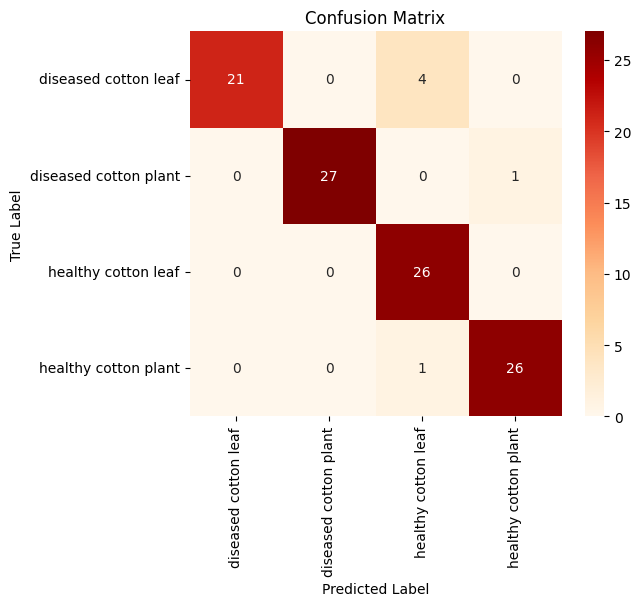

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
class_labels = list(val_ds.class_indices.keys())
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='OrRd',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

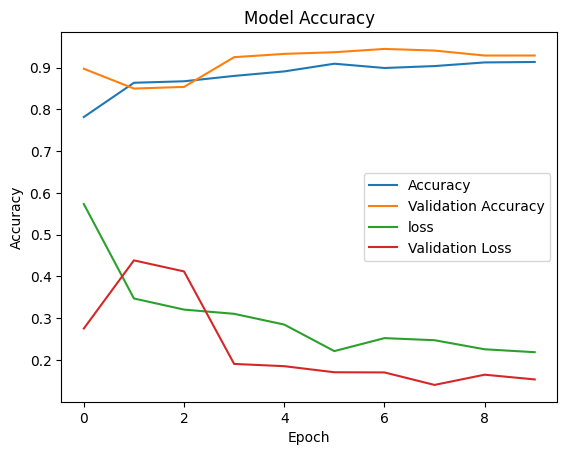

In [ ]:
#Ploting Acuracy & Loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()